In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns

We used seaborn to draw the heat map.

In [39]:
data1 = pd.read_csv('crime_incident.csv', encoding='latin-1')
print(data1.shape)

(440893, 17)


In [12]:
data1.head()

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
0,TESTTEST2,423,NaN,ASSAULT - AGGRAVATED,External,,0,2019-10-16 00:00:00,2019,10,Wednesday,0,NaN,RIVERVIEW DR,NaN,NaN,"(0.00000000, 0.00000000)"
1,I92089785,3005,NaN,SICK ASSIST,E13,574,0,2019-11-05 18:00:00,2019,11,Tuesday,18,NaN,WASHINGTON ST,NaN,NaN,"(0.00000000, 0.00000000)"
2,I90583827,1402,NaN,VANDALISM,E18,498,0,2019-11-02 05:09:00,2019,11,Saturday,5,NaN,BRADLEE ST,NaN,NaN,"(0.00000000, 0.00000000)"
3,I192082859,724,Auto Theft,AUTO THEFT,E18,519,NaN,2019-10-13 09:28:24,2019,10,Sunday,9,Part One,LINCOLN ST,42.259518,-71.121563,"(42.25951765, -71.12156299)"
4,I192082751,724,Auto Theft,AUTO THEFT,E18,493,NaN,2019-10-12 20:11:26,2019,10,Saturday,20,Part One,METROPOLITAN AVE,42.262092,-71.116710,"(42.26209214, -71.11670964)"


Clean out all the districts that are not included in this project, then pick part one for all the crime incidents happened in these areas.

In [1]:
data1 = data1.loc[data1['YEAR'].isin([2018,2019])]
data1 = data1.loc[(data1['DISTRICT'] == 'A7') | (data1['DISTRICT'] == 'B2') | (data1['DISTRICT'] == 'B3') | (data1['DISTRICT'] == 'C11') | (data1['DISTRICT'] == 'E5')]
print(1)




NameError: name 'data1' is not defined

In [4]:
data1 = data1.loc[data1['UCR_PART'] == 'Part One']

In [5]:
# Remove unused columns
data1 = data1.drop(['INCIDENT_NUMBER','OFFENSE_CODE','UCR_PART','Location'], axis=1)

# Convert OCCURED_ON_DATE to datetime
data1['OCCURRED_ON_DATE'] = pd.to_datetime(data1['OCCURRED_ON_DATE'])

# Fill in nans in SHOOTING column
data1.SHOOTING.fillna('N', inplace=True)

# Convert DAY_OF_WEEK to an ordered category
data1.DAY_OF_WEEK = pd.Categorical(data1.DAY_OF_WEEK, 
              categories=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'],
              ordered=True)

# Replace -1 values in Lat/Long with Nan
data1.Lat.replace(-1, None, inplace=True)
data1.Long.replace(-1, None, inplace=True)

# Rename columns to something easier to type (the all-caps are annoying!)
rename = {'OFFENSE_CODE_GROUP':'Group',
         'OFFENSE_DESCRIPTION':'Description',
         'DISTRICT':'District',
         'REPORTING_AREA':'Area',
         'SHOOTING':'Shooting',
         'OCCURRED_ON_DATE':'Date',
         'YEAR':'Year',
         'MONTH':'Month',
         'DAY_OF_WEEK':'Day',
         'HOUR':'Hour',
         'STREET':'Street'}
data1.rename(index=str, columns=rename, inplace=True)

# Check
data1.head()

,Group,Description,District,Area,Shooting,Date,Year,Month,Day,Hour,Street,Lat,Long
17,Residential Burglary,BURGLARY - RESIDENTIAL - ATTEMPT,B2,316,N,2019-09-29 04:40:00,2019,9,Sunday,4,ABBOTSFORD ST,42.314630,-71.092615
28,Aggravated Assault,ASSAULT - AGGRAVATED,A7,17,N,2019-09-29 02:30:00,2019,9,Sunday,2,CHELSEA ST,42.379124,-71.028082
38,Auto Theft,AUTO THEFT,C11,,N,2018-04-26 16:06:00,2018,4,Thursday,16,NaN,NaN,NaN
41,Robbery,ROBBERY - STREET,A7,23,N,2019-09-29 01:30:00,2019,9,Sunday,1,BENNINGTON ST,42.375470,-71.037302
47,Aggravated Assault,ASSAULT - AGGRAVATED - BATTERY,C11,340,N,2019-09-29 00:08:40,2019,9,Sunday,0,BOWDOIN ST,42.308111,-71.064584


In [6]:
# A few more data checks
data1.dtypes
data1.isnull().sum()
data1.shape


(12458, 13)

Generate heat mao by seaborn.

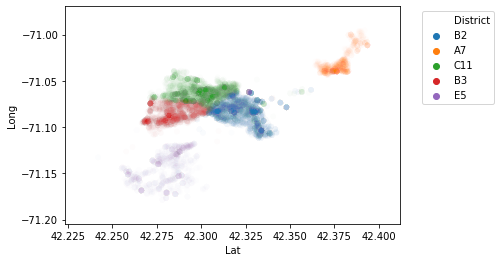

In [7]:
# Plot districts
sns.scatterplot(x='Lat',
               y='Long',
                hue='District',
                alpha=0.01,
               data=data1)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2)

In [8]:
import folium
from folium.plugins import HeatMap

Generate a heap map based on actual map by folium, only insert necessary columns.

In [9]:
# Create basic Folium crime map
#crime_map = folium.Map(location=[42.3125,-71.0875], 
crime_map = folium.Map(location=[42.3125,-71.0875], 
                       tiles = "Stamen Toner",
                      zoom_start = 11)

# Add data for heatmp 
data_heatmap = data1[data1.Year == 2018]
data_heatmap = data1[['Lat','Long']]
data_heatmap = data1.dropna(axis=0, subset=['Lat','Long'])
data_heatmap = [[row['Lat'],row['Long']] for index, row in data_heatmap.iterrows()]
HeatMap(data_heatmap, radius=10).add_to(crime_map)

# Plot!
crime_map

# Closed business

Decrease the data size to wanted areas and needed information.

In [12]:
Closed_business = pd.read_csv('new_all_business.csv', encoding='latin-1')
Closed_business = Closed_business.loc[(Closed_business['Record Type'] != 'Verified')]

Closed_business = Closed_business[['Company Name', 'Latitude', 'Longitude']]
print(Closed_business.shape)

(751, 3)


In [11]:
crime_map = folium.Map(location=[42.3125,-71.0875], 
                       tiles = "Stamen Toner",
                      zoom_start = 11)

# Add data for heatmp 
data_heatmap = Closed_business[['Latitude','Longitude']]
data_heatmap = Closed_business.dropna(axis=0, subset=['Latitude','Longitude'])
data_heatmap = [[row['Latitude'],row['Longitude']] for index, row in data_heatmap.iterrows()]
HeatMap(data_heatmap, radius=10).add_to(crime_map)

# Plot!
crime_map

#  SQFT by city with both businesses

Decrease the data size to wanted areas and needed information.

In [14]:
df = pd.read_csv('new_all_business_cleaned.csv', encoding='latin-1')

print(df.shape)

(3857, 31)


In [15]:
# Remove unused columns
df = df[['Latitude','Longitude','Rent per Square Foot']]

# Check
df.head()
print(df.shape)
print(df[:10])

(3857, 3)
    Latitude  Longitude  Rent per Square Foot
0  42.325477 -71.087721                  4.67
1  42.370491 -71.038779                  8.75
2  42.325189 -71.085015                  2.50
3  42.372850 -71.039332                  5.00
4  42.322887 -71.087751                  2.50
5  42.301191 -71.059741                  2.33
6  42.305787 -71.055555                 10.00
7  42.324847 -71.087881                  4.67
8  42.309476 -71.062841                  4.67
9  42.324787 -71.087711                  4.67


In [16]:
crime_map = folium.Map(location=[42.3125,-71.0875], 
                       tiles = "Stamen Toner",
                      zoom_start = 11)

# Add data for heatmp 
data_heatmap = df[['Latitude','Longitude']]
data_heatmap = df.dropna(axis=0, subset=['Latitude','Longitude'])
data_heatmap = [[row['Latitude'],row['Longitude']] for index, row in data_heatmap.iterrows()]
HeatMap(data_heatmap, radius=10).add_to(crime_map)

# Plot!
crime_map

# SQRT with closed business

In [17]:
df2 = pd.read_csv('new_all_business_cleaned.csv', encoding='latin-1')
df2 = df2.loc[(df2['Record Type'] != 'Verified')]

df2 = df2[['Latitude', 'Longitude', 'Rent per Square Foot']]


Decrease the data size to wanted areas and needed information.

In [18]:
crime_map = folium.Map(location=[42.3125,-71.0875], 
                       tiles = "Stamen Toner",
                      zoom_start = 11)

# Add data for heatmp 
data_heatmap = df[['Latitude','Longitude']]
data_heatmap = df.dropna(axis=0, subset=['Latitude','Longitude'])
data_heatmap = [[row['Latitude'],row['Longitude']] for index, row in data_heatmap.iterrows()]
HeatMap(data_heatmap, radius=10).add_to(crime_map)

# Plot!
crime_map

# Rent Expenses

In [19]:
df2 = pd.read_csv('new_all_business_cleaned.csv', encoding='latin-1')
df2 = df2.loc[(df2['Record Type'] != 'Verified')]

df2 = df2[['Latitude', 'Longitude', 'Rent Expenses']]


Decrease the data size to wanted areas and needed information.

In [20]:
crime_map = folium.Map(location=[42.3125,-71.0875], 
                       tiles = "Stamen Toner",
                      zoom_start = 11)

# Add data for heatmp 
data_heatmap = df[['Latitude','Longitude']]
data_heatmap = df.dropna(axis=0, subset=['Latitude','Longitude'])
data_heatmap = [[row['Latitude'],row['Longitude']] for index, row in data_heatmap.iterrows()]
HeatMap(data_heatmap, radius=10).add_to(crime_map)

# Plot!
crime_map